## Some Natural Language Processing Works by Using NLTK 

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Dispersion Plot
#### Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

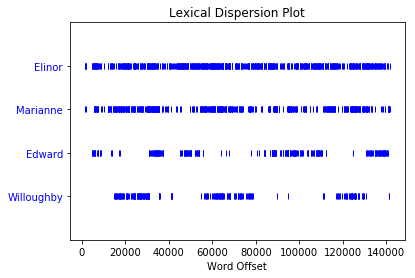

In [2]:
text2.dispersion_plot(['Elinor', 'Marianne', 'Edward', 'Willoughby'])

From the dispersion plot above, we can see that females (Elinor and Marianne) have more plays than males (Edward and Willoughby) in this novel. It is hard to indentify the couples from this dispersion plot.

## Word Usage Over Time

#### Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

   year  num_men  num_women  num_people
0  1945        2          2          10
1  1946       12          7          49
2  1947        7          2          12
3  1948        5          1          22
4  1949        2          1          15


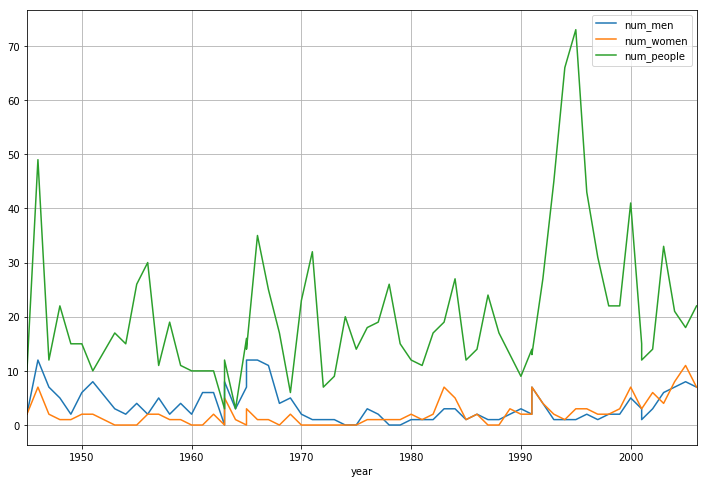

In [3]:
from nltk.corpus import state_union
import pandas as pd
%matplotlib inline  
df = []
for fileid in state_union.fileids():
    num_men = len([w for w in state_union.words(fileid) if w.lower()=='men'])
    num_women = len([w for w in state_union.words(fileid) if w.lower()=='women'])
    num_people = len([w for w in state_union.words(fileid) if w.lower()=='people'])
    year = int(fileid[:4])
    df.append([year, num_men, num_women, num_people])
#print(df)
df = pd.DataFrame(df, columns=('year', 'num_men', 'num_women', 'num_people'))
print(df.head())
df.plot(x='year', y=['num_men', 'num_women', 'num_people'],figsize=(12,8),grid=True)

The occurence of the word "people" is pretty high in the middle of 1990s, and it is apparently periodic. Before 1975, the occurence of "men" is higher than "women", but after that, the occurence of "women" is almost equal or a little higher than "man".

## Confirm Zipf's Law

#### Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?

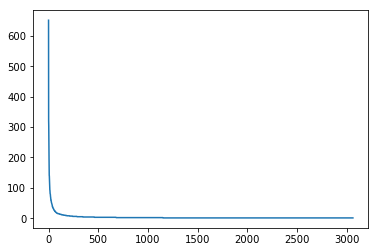

In [5]:
import pylab
import numpy as np
from nltk.corpus import brown
text = brown.words(categories='science_fiction') # sample large text
words = set([w for w in text if w.isalpha()])
counts = sorted([text.count(w) for w in words], reverse=True)
#print(np.log(counts))
pylab.plot(counts) # The x axis is the index, as "counts" is sorted, so the index is also the rank.

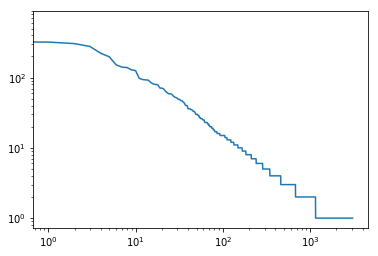

In [6]:
# log-log plot: change the scales of x and y axis
pylab.plot(counts) 
pylab.yscale('log')
pylab.xscale('log')

According to the figure above, we can confirm Zipf's law. At the extreme right end of the plotted line, there are apparent steps, which means that a lot of words have quite low occurences. At the extreme left end, the line is quite flat, which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.